In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/UpdatedMLBStats.csv")


In [ ]:
df.dtypes

last_name, first_name     object
player_id                  int64
year                       int64
p_game                     int64
p_formatted_ip           float64
hit                        int64
strikeout                  int64
walk                       int64
p_earned_run               int64
dtype: object

In [ ]:
df.head()

,"last_name, first_name",player_id,year,p_game,p_formatted_ip,hit,strikeout,walk,p_earned_run
0,"Colon, Bartolo",112526,2017,28,143.0,192,89,35,103
1,"Sabathia, CC",282332,2017,27,148.2,139,120,50,61
2,"Dickey, R.A.",285079,2017,31,190.0,193,136,67,90
3,"Lackey, John",407793,2017,31,170.2,165,149,53,87
4,"Wainwright, Adam",425794,2017,24,123.1,140,96,45,70


In [ ]:
missing_data= df.isnull()
missing_data.head()

,"last_name, first_name",player_id,year,p_game,p_formatted_ip,hit,strikeout,walk,p_earned_run
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


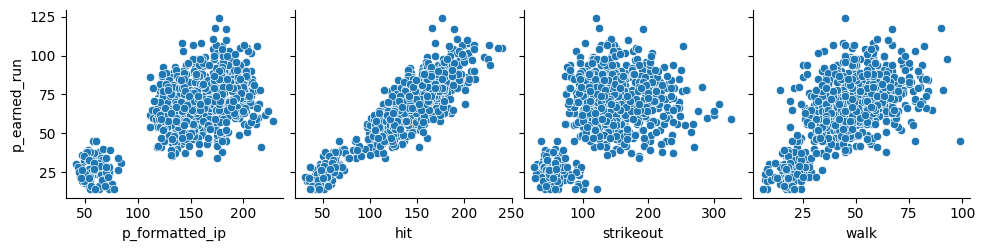

In [ ]:
sns.pairplot(data= df,
             y_vars = ["p_earned_run"],
             x_vars = ['p_formatted_ip', 'hit', 'strikeout','walk' ])

In [ ]:
df.head()

,"last_name, first_name",player_id,year,hit,strikeout,walk,innings pitched,games,Earned Runs,innings per game,walks per game,strikeouts per game,hits per game
0,"Colon, Bartolo",112526,2017,192,89,35,143.0,28,3.678571,5.107143,1.250000,3.178571,6.857143
1,"Sabathia, CC",282332,2017,139,120,50,148.2,27,2.259259,5.488889,1.851852,4.444444,5.148148
2,"Dickey, R.A.",285079,2017,193,136,67,190.0,31,2.903226,6.129032,2.161290,4.387097,6.225806
3,"Lackey, John",407793,2017,165,149,53,170.2,31,2.806452,5.490323,1.709677,4.806452,5.322581
4,"Wainwright, Adam",425794,2017,140,96,45,123.1,24,2.916667,5.129167,1.875000,4.000000,5.833333


In [ ]:
df['innings pitched'] = df['p_formatted_ip']
df.drop('p_formatted_ip', axis =1, inplace = True)
df['games'] = df['p_game']
df.drop('p_game', axis =1, inplace = True)
df['Earned Runs'] = df['p_earned_run']
df.drop('p_earned_run', axis =1, inplace = True)

In [ ]:
df['innings per game'] = df['innings pitched']/df['games']
df['walks per game'] = df['walk']/df['games']
df['strikeouts per game'] = df['strikeout']/df['games']
df['hits per game'] = df['hit']/df['games']
df['Earned Runs']= df['Earned Runs']/df['games']

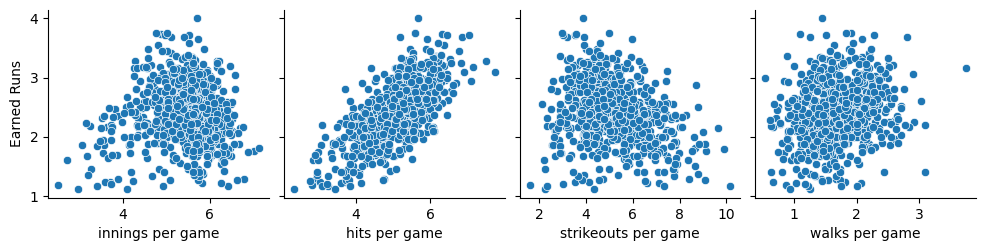

In [ ]:
sns.pairplot(data= df,
             y_vars = ["Earned Runs"],
             x_vars = ['innings per game', 'hits per game', 'strikeouts per game','walks per game' ])

In [ ]:
X = df[['innings per game', 'hits per game', 'strikeouts per game', 'walks per game']]
Y = df[['Earned Runs']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", mse)



Root Mean Squared Error: 0.11808734678846378


In [ ]:
game_data = pd.DataFrame({'innings per game':[], 'hits per game': [5], 'strikeouts per game':[5], 'walks per game': [3]})
predicted_er = lm.predict(game_data)
print("predicted Earned Runs Allowed per game:", predicted_er)

predicted Earned Runs Allowed per game: [[-29.23829591]]


In [ ]:
Predictmodel = sm.OLS(y_train, x_train).fit()
print(Predictmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:            Earned Runs   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.053e+04
Date:                Thu, 25 Apr 2024   Prob (F-statistic):                        0.00
Time:                        18:04:43   Log-Likelihood:                         -105.80
No. Observations:                 602   AIC:                                      219.6
Df Residuals:                     598   BIC:                                      237.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

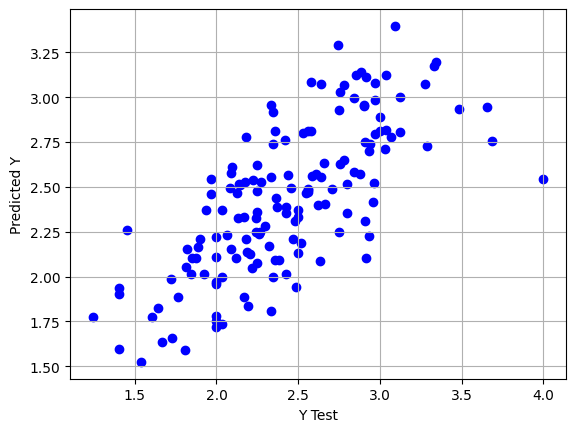

In [ ]:
plt.scatter(y_test,y_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.grid()

In [ ]:
lm.coef_

array([[-0.33804592,  0.59798726,  0.03754735,  0.29269995]])

In [ ]:
game_data = pd.DataFrame({'innings per game':[8], 'hits per game': [4], 'strikeouts per game':[4], 'walks per game': [3]})
predicted_er = lm.predict(game_data)
print("predicted Earned Runs per game:", predicted_er)

predicted Earned Runs per game: [[1.22639385]]


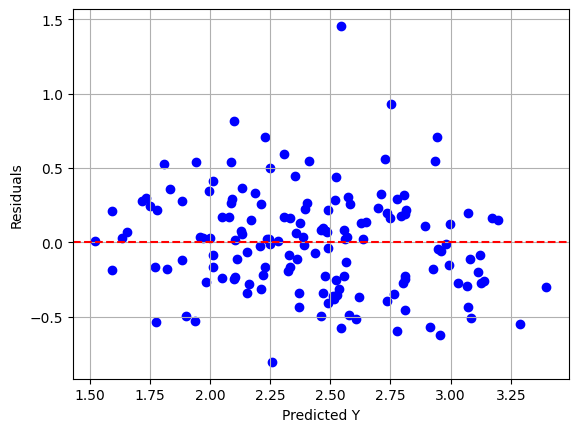

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, c='blue')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid()

In [ ]:

game_data = pd.DataFrame({'innings per game':[4.3], 'hits per game': [2], 'strikeouts per game':[6], 'walks per game': [0]})
predicted_era = lm.predict(game_data)
print("predicted Earned Runs per game:", predicted_er)

predicted Earned Runs per game: [[1.22639385]]


In [ ]:
y_test

,Earned Runs Allowed
716,2.363636
651,2.964286
371,2.222222
77,2.575758
212,2.800000
...,...
332,1.969697
90,2.560000
356,2.166667
652,2.782609


In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=262f9e8d69b6113b905bb123873f5511c387f4694b0da1fe4e4a3ed760083c6c
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:

perm = PermutationImportance(lm, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
1.7294 ± 0.4112,hits per game
0.4408 ± 0.0784,innings per game
0.1601 ± 0.0627,walks per game
0.0166 ± 0.0184,strikeouts per game


In [ ]:
# Innnings and hits are most important while K's and walks are not

Spencer Strider:


In [ ]:
game_data = pd.DataFrame({'innings per game':[5], 'hits per game': [3], 'strikeouts per game':[8], 'walks per game': [2]})
predicted_er = lm.predict(game_data)
print("predicted Earned Runs per game:", predicted_er)

predicted Earned Runs per game: [[1.5000338]]


In [ ]:
game_data = pd.DataFrame({'innings per game':[4], 'hits per game': [7], 'strikeouts per game':[4], 'walks per game': [3]})
predicted_er = lm.predict(game_data)
print("predicted Earned Runs per game:", predicted_er)

predicted Earned Runs per game: [[4.37253931]]


Framber Valdez

In [ ]:
game_data = pd.DataFrame({'innings per game':[4.66], 'hits per game': [5], 'strikeouts per game':[5], 'walks per game': [6]})
predicted_er = lm.predict(game_data)
print("predicted Earned Runs per game:", predicted_er)

predicted Earned Runs Allowed per game: [[3.86910169]]


In [ ]:
game_data = pd.DataFrame({'innings per game':[7.66], 'hits per game': [6], 'strikeouts per game':[5], 'walks per game': [0]})
predicted_er = lm.predict(game_data)
print("predicted Earned Runs per game:", predicted_er)

predicted Earned Runs per game: [[1.69675148]]


Ronel Blanco
https://www.espn.com/mlb/player/gamelog/_/id/41829/ronel-blanco

In [ ]:
game_data = pd.DataFrame({'innings per game':[9], 'hits per game': [0], 'strikeouts per game':[7], 'walks per game': [2]})
predicted_er = lm.predict(game_data)
print("TOR predicted Earned Runs per game:", predicted_er)

TOR predicted Earned Runs per game: [[-1.68365901]]


In [ ]:
game_data = pd.DataFrame({'innings per game':[6], 'hits per game': [1], 'strikeouts per game':[4], 'walks per game': [4]})
predicted_er = lm.predict(game_data)
print("TEX predicted Earned Runs per game:", predicted_er)

TEX predicted Earned Runs per game: [[0.40122386]]


In [ ]:
game_data = pd.DataFrame({'innings per game':[6], 'hits per game': [5], 'strikeouts per game':[5], 'walks per game': [3]})
predicted_er = lm.predict(game_data)
print("TEX predicted Earned Runs per game:", predicted_er)

TEX predicted Earned Runs per game: [[2.5380203]]


In [ ]:
game_data = pd.DataFrame({'innings per game':[6], 'hits per game': [5], 'strikeouts per game':[6], 'walks per game': [3]})
predicted_er = lm.predict(game_data)
print("WSH predicted Earned Runs per game:", predicted_er)

WSH predicted Earned Runs per game: [[2.57556765]]


Hunter Brown
https://www.espn.com/mlb/player/gamelog/_/id/4717803/hunter-brown


In [ ]:
game_data = pd.DataFrame({'innings per game':[3], 'hits per game': [8], 'strikeouts per game':[3], 'walks per game': [4]})
predicted_er = lm.predict(game_data)
print("TEX predicted Earned Runs per game:", predicted_er)

TEX predicted Earned Runs per game: [[5.56372509]]


In [ ]:
game_data = pd.DataFrame({'innings per game':[.666], 'hits per game': [11], 'strikeouts per game':[0], 'walks per game': [1]})
predicted_er = lm.predict(game_data)
print("KC predicted Earned Runs per game:", predicted_er)

KC predicted Earned Runs per game: [[7.15594413]]


In [ ]:
game_data = pd.DataFrame({'innings per game':[6], 'hits per game': [5], 'strikeouts per game':[3], 'walks per game': [3]})
predicted_er = lm.predict(game_data)
print("ATL predicted Earned Runs per game:", predicted_er)

ATL predicted Earned Runs per game: [[2.4629256]]


In [ ]:
game_data = pd.DataFrame({'innings per game':[4], 'hits per game': [4], 'strikeouts per game':[6], 'walks per game': [2]})
predicted_er = lm.predict(game_data)
print("WSH predicted Earned Runs per game:", predicted_er)

WSH predicted Earned Runs per game: [[2.36097227]]


Christian Javier


In [ ]:
game_data = pd.DataFrame({'innings per game':[6], 'hits per game': [4], 'strikeouts per game':[6], 'walks per game': [1]})
predicted_er = lm.predict(game_data)
print("NYY predicted Earned Runs per game:", predicted_er)

NYY predicted Earned Runs per game: [[1.39218048]]


In [ ]:
game_data = pd.DataFrame({'innings per game':[5], 'hits per game': [1], 'strikeouts per game':[3], 'walks per game': [5]})
predicted_er = lm.predict(game_data)
print("TOR predicted Earned Runs per game:", predicted_er)

TOR predicted Earned Runs per game: [[0.99442238]]


In [ ]:
game_data = pd.DataFrame({'innings per game':[5.333], 'hits per game': [5], 'strikeouts per game':[4], 'walks per game': [3]})
predicted_er = lm.predict(game_data)
print("KC predicted Earned Runs per game:", predicted_er)

KC predicted Earned Runs per game: [[2.72594958]]


In [ ]:
game_data = pd.DataFrame({'innings per game':[7], 'hits per game': [5], 'strikeouts per game':[5], 'walks per game': [2]})
predicted_er = lm.predict(game_data)
print("TEX predicted Earned Runs per game:", predicted_er)

TEX predicted Earned Runs per game: [[1.90727443]]
